<a href="https://colab.research.google.com/github/1bin01/Machine-Learning/blob/main/Introduction-to-Machine-Learning/Ch5_model_evaluation_and_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
!pip install -q --upgrade scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from importlib import reload  # plt 다시 그릴 때
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 경고 제거 (없어도 문제는 x)

# 나눔 포트 설정 (런타임 다시 시작 해줘야됨!)
import matplotlib as mpl
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 8.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=6d27fe92fddcc0354b8b9b9d82e96c36d2b3b84a5850c66bb1a7464f0857e50e
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 7.9 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
     |████████████████████████████████| 31.2 MB 1.3 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-co

## 5.1 교차 검증

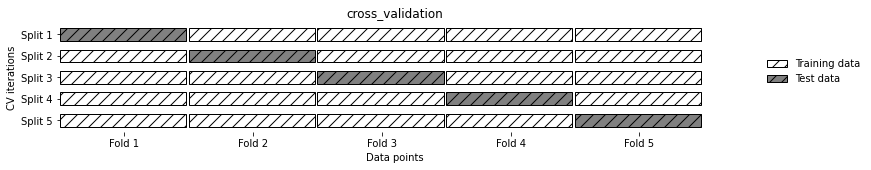

In [3]:
# 데이터를 여러 번 반복해 나누고 여러 모델을 학습

mglearn.plots.plot_cross_validation()

## 5.1.1 scikit-learn의 교차 검증

In [4]:
# iris 데이터 셋을 적용한 Logistic Regression 모델 평가하기

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter = 1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [5]:
# cv 매개변수로 폴드의 수 바꾸기
scores = cross_val_score(logreg, iris.data, iris.target, cv = 10)
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [7]:
# 교차 검증 평균 점수
print("교차 검증 평균 점수 : {:.2f}" .format(scores.mean()))

교차 검증 평균 점수 : 0.97


In [10]:
# cross_validate : 훈련과 테스트에 걸린 시간을 딕셔너리로 반환
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, return_train_score = True)
res

{'fit_time': array([0.03240252, 0.03908062, 0.02793217, 0.02640557, 0.02932787]),
 'score_time': array([0.00088573, 0.00064254, 0.00062704, 0.00061393, 0.00061846]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [13]:
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.032403,0.000886,0.966667,0.966667
1,0.039081,0.000643,1.000000,0.966667
2,0.027932,0.000627,0.933333,0.983333
3,0.026406,0.000614,0.966667,0.983333
4,0.029328,0.000618,1.000000,0.975000


## 5.1.2 교차 검증의 장점